In [1]:
from autoencoder import create_autoencoder
from tensorflow.keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
from imageLoad import getPathToAllImages, sampleImages

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 16)      272       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 8)         3208      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 1)           129       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 1)           17        
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 32, 32, 1)         0

In [2]:
pathToAllImages = getPathToAllImages()

Train on 1024 samples
Epoch 1/10
1024/1024 [==============================] - 11s 10ms/sample - loss: 0.6933

KeyboardInterrupt: 

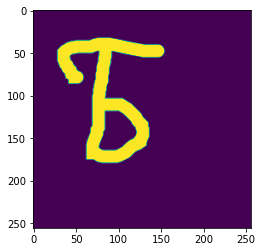

In [5]:
"""
To avoid loading all the pictures into memory at the same time, I am loading [N] at a time and having 10 epochs for each
loaded 'batch'
"""
N = 1024
validationSetSize = 200
tensorboardLogs = ".\\Logs"
tensorboard_callback = TensorBoard(log_dir=tensorboardLogs)

# Chose one of the next 2 lines to either resume training or start a new model

#model = load_model(".\\models\\4.h5")
model = create_autoencoder()

In [ ]:
train_sequences = 10
for i in range(train_sequences):
    train_data = sampleImages(pathToAllImages, dim1=256, dim2=256, n = N, exclude = validationSetSize)
    plt.imshow(train_data[0].reshape(256, 256))
    model.fit(train_data, train_data, 32, 10*i+10, callbacks = [tensorboard_callback], initial_epoch=10*i)
    model.save(".\\models\\"+str(i)+".h5")